## Import the librarys

In [ ]:
pip install --upgrade keras

In [ ]:
import numpy as np
import pandas as pd
import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


## Import the dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:

X_test.shape

(10000, 28, 28)



---We have 60000 training images and 10000 test images

---Data is 28*28 in size



## Data Visualization

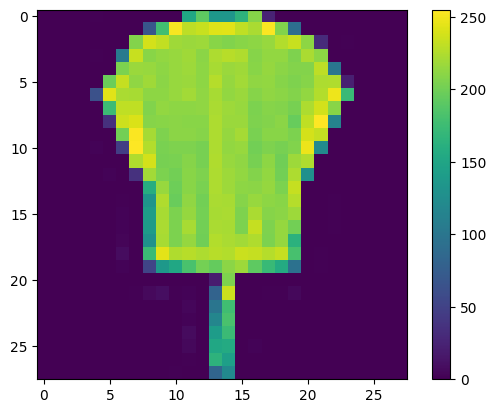

In [ ]:
plt.figure()
plt.imshow(X_train[56])  #visualization of random images
plt.colorbar()
plt.grid(False)
plt.show()



## Data Normalization

In [ ]:
X_train = X_train / 255.0

X_test = X_test / 255.0


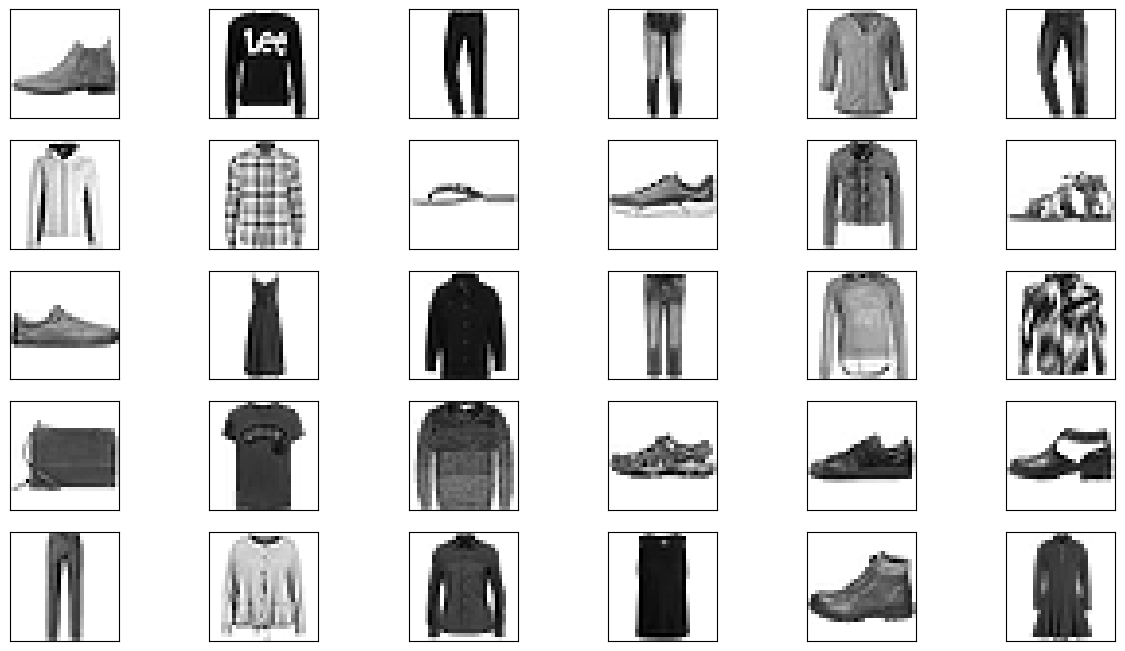

In [ ]:
## Visualize the 30 images
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(9,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

## Creating a Machine Learning Model

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

---This process transforms each 28x28 image in the dataset into a 784-element vector, creating a matrix with a total size of 60,000 x 784.



In [ ]:
# KNN model

knn=KNeighborsClassifier().fit(X_train,y_train)


In [ ]:
y_pred=knn.predict(X_test)


[9 2 1 ... 8 1 7]





--- The K-NN (K-Nearest Neighbors) model is an instance-based machine learning algorithm that classifies or predicts a data point based on the majority class or average of its nearest neighbors.


--- You can also use many different algorithms to train a dataset, depending on the nature of the problem (classification, regression, clustering, etc.) and the data itself. Examples include decision trees, support vector machines (SVM), neural networks, random forests, and gradient boosting, among others. Each algorithm has its strengths and works better for specific types of data and tasks.



## Evaluation Metrics

In [ ]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [ ]:
acc

0.8554

In [ ]:
precision

0.8578152450755355

In [ ]:
recall

0.8554

In [ ]:
f1

0.8546439722018904

In [ ]:
cm

array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]])


--- Accuracy (0.8554): The model predicts with 85.54% accuracy, but it may be misleading in imbalanced datasets.

--- Precision (0.8578): 85.78% of the predicted positives are correct, indicating few false positives.

--- Recall (0.8554): Captures 85.54% of true positives, meaning it doesn't miss many positive cases.

--- F1 Score (0.8546): Balances precision and recall well, indicating the model performs consistently.


--- Confusion Matrix:

- **Rows**: True labels.
- **Columns**: Predicted labels.
- **Cells**: Count of correct or incorrect predictions.

  Example:
  - **855**: Correctly predicted "0" class.
  - **100**: Misclassified "0" as "8".

